<a href="https://www.kaggle.com/code/arjukundu/microsoft-stocks-from-1986-2023?scriptVersionId=133797926" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-stocks-from-1986-to-2023/Microsoft Stocks.csv


In [2]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')



In [3]:
#outputdata
data= pd.read_csv('/kaggle/input/microsoft-stocks-from-1986-to-2023/Microsoft Stocks.csv')
data.sample(100)

,Date,Price,Open,High,Low,Volume
2517,05/16/2013,34.08,33.64,34.15,33.55,59380000
472,06/29/2021,271.40,268.86,271.65,267.98,19940000
315,02/10/2022,302.38,304.04,309.12,300.70,45390000
5458,09/04/2001,28.05,28.59,29.54,28.04,67190000
9197,11/14/1986,0.15,0.15,0.15,0.14,18720000
...,...,...,...,...,...,...
641,10/26/2020,210.08,213.85,216.34,208.10,37110000
3829,02/29/2008,27.20,27.69,27.83,27.02,117410000
6836,03/19/1996,6.68,6.65,6.69,6.55,92490000
6739,08/06/1996,7.75,7.60,7.76,7.55,67390000


In [4]:
data.max()

Date      12/31/2021
Price         343.11
Open          344.62
High          349.67
Low            342.2
Volume     788690000
dtype: object

In [5]:
data.min()

Date      01/02/1987
Price           0.09
Open            0.09
High            0.09
Low             0.09
Volume       2300000
dtype: object

In [6]:
data.cummin()

,Date,Price,Open,High,Low,Volume
0,05/15/2023,309.46,309.10,309.90,307.59,16290000
1,05/12/2023,308.97,309.10,309.90,306.60,16290000
2,05/11/2023,308.97,309.10,309.90,306.26,16290000
3,05/10/2023,308.97,308.62,309.90,306.26,16290000
4,05/09/2023,307.00,308.00,309.90,306.26,16290000
...,...,...,...,...,...,...
9364,01/02/1987,0.09,0.09,0.09,0.09,2300000
9365,01/02/1987,0.09,0.09,0.09,0.09,2300000
9366,01/02/1987,0.09,0.09,0.09,0.09,2300000
9367,01/02/1987,0.09,0.09,0.09,0.09,2300000


In [7]:
data.head()

,Date,Price,Open,High,Low,Volume
0,05/15/2023,309.46,309.10,309.90,307.59,16290000
1,05/12/2023,308.97,310.55,310.65,306.60,19770000
2,05/11/2023,310.11,310.10,311.12,306.26,31680000
3,05/10/2023,312.31,308.62,313.00,307.67,30080000
4,05/09/2023,307.00,308.00,310.04,306.31,21340000


In [8]:
# Converting the Date column data type from object to datetime
data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce', dayfirst = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9369 non-null   datetime64[ns]
 1   Price   9369 non-null   float64       
 2   Open    9369 non-null   float64       
 3   High    9369 non-null   float64       
 4   Low     9369 non-null   float64       
 5   Volume  9369 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 439.3 KB


/tmp/ipykernel_20/346359180.py:2: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce', dayfirst = True)


In [9]:
px.line(data, x = 'Date', y = 'Low', title = 'Stock Performance for Microsoft')


In [10]:
px.bar(data, x = 'Date', y = 'Low', title = 'Stock Performance for Microsoft')


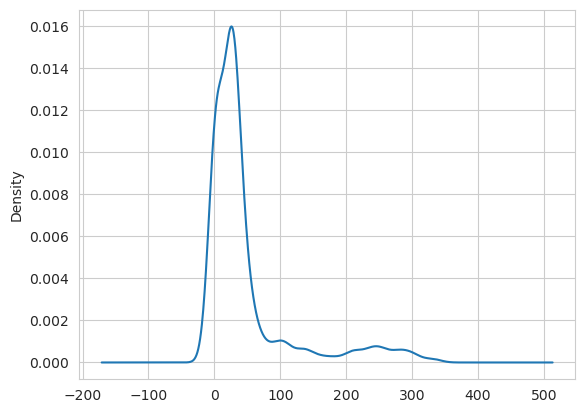

In [11]:
df_close = data['Low']
df_close.plot(kind='kde');

In [12]:
import plotly.graph_objects as go

import pandas as pd

from datetime import datetime



In [13]:
df = pd.read_csv('/kaggle/input/microsoft-stocks-from-1986-to-2023/Microsoft Stocks.csv')

df.head()

,Date,Price,Open,High,Low,Volume
0,05/15/2023,309.46,309.10,309.90,307.59,16290000
1,05/12/2023,308.97,310.55,310.65,306.60,19770000
2,05/11/2023,310.11,310.10,311.12,306.26,31680000
3,05/10/2023,312.31,308.62,313.00,307.67,30080000
4,05/09/2023,307.00,308.00,310.04,306.31,21340000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9369 non-null   object 
 1   Price   9369 non-null   float64
 2   Open    9369 non-null   float64
 3   High    9369 non-null   float64
 4   Low     9369 non-null   float64
 5   Volume  9369 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 439.3+ KB


In [15]:
data['MA10'] = data['Low'].rolling(window = 10).mean().reset_index(0, drop = True)
data['MA20'] = data['Low'].rolling(window = 20).mean().reset_index(0, drop = True)

In [16]:
# Plotting the Close, MA10, MA20 using the line chart
px.line(data, x = 'Date', y = ['Low', 'MA10', 'MA20'], title = 'Moving Averages for Stock Microsoft')

In [17]:
data.sample(10)

,Date,Price,Open,High,Low,Volume,MA10,MA20
199,2022-07-29,280.74,277.70,282.00,276.63,32150000,279.069,281.2260
5500,2001-05-07,34.26,35.11,35.36,34.22,49270000,33.957,33.5790
7805,1992-05-19,2.39,2.36,2.39,2.36,51240000,2.427,2.4090
4777,2004-05-24,25.76,26.04,26.17,25.74,56260000,25.878,26.4685
2763,2012-05-22,29.76,29.69,29.88,29.50,39510000,28.834,29.0105
6284,1998-05-27,21.50,20.72,21.53,20.72,58570000,21.059,21.6120
4178,2006-09-10,27.72,27.80,27.93,27.62,33369999,27.938,28.1445
87,2023-09-01,227.12,226.45,231.24,226.41,27040000,233.078,239.5350
6253,1998-10-07,28.30,27.78,28.31,27.47,45400000,28.535,27.8000
3284,2010-04-29,31.00,30.93,31.43,30.67,52670000,29.264,28.2390
